In [34]:
%cd /mnt/ebola/ebov

/mnt/ebola/ebov


In [35]:
!sqlite3 metadata/metadata.db ".schema"

CREATE TABLE runs (sample_fk integer, batch varchar (100), batch2 varchar (100), include varchar (1), start datetime, "end" datetime, duration float, num_reads_pass integer, num_reads_fail integer, tpr float, num_reads_align integer, mean_cov float, median_cov float, paper_submission boolean, dataset STRING, start_second_batch datetime, end_second_batch datetime, duration_second_batch datetime, num_reads_pass_second_batch datetime, num_reads_fail_second_batch datetime);
CREATE TABLE samples (LabID varchar (100), prefecture varchar (100), sousprefecture varchar (100), village varchar (100), ct varchar (100), date_sample_taken date, pcr_date_for_sequencing date, sequencing_date date, upload_date date, protocol varchar (100), notes varchar (100), notes2 varchar (100), destination varchar (100), prevlabbid varchar (100), seqid varchar (100), sample_type STRING (10));


In [50]:
%%bash

echo -e ".mode csv\n.headers on\n.output times.csv\nselect LabID, date_sample_taken, start, start_second_batch from samples, runs where runs.sample_fk = samples.ROWID and dataset='EMLab' and include = 'T';" | sqlite3 metadata/metadata.db

In [45]:
!cat times.csv

LabID,date_sample_taken,start,start_second_batch
EM_COY_2015_014370,2015-04-07,"2015-04-18 20:20:20",
EM_COY_2015_015802,2015-04-14,"2015-04-20 19:58:17",
EM_COY_2015_015815,2015-04-14,"2015-04-20 19:58:12",
EM_GUI_2015_004674,2015-03-26,"2015-04-21 21:12:11",
EM_COY_2015_015972,2015-04-20,"2015-04-22 19:42:39",
EM_COY_2015_015986,2015-04-20,"2015-04-22 19:42:57",
EM_COY_2015_013671,2015-03-12,"2015-04-23 22:31:41",
EM_COY_2015_013731,2015-03-14,"2015-04-23 22:32:16",
EM_COY_2015_014098,2015-03-26,"2015-04-24 12:06:33",
EM_COY_2015_014100,2015-03-26,"2015-04-24 11:56:04",
EM_COY_2015_013857,2015-03-18,"2015-04-25 20:56:15",
EM_COY_2015_013962,2015-03-22,"2015-04-25 20:53:12",
EM_COY_2015_015980,2015-04-20,"2015-04-25 20:52:54",
EM_COY_2015_015982,2015-04-20,"2015-04-26 09:35:13",
EM_FORE_2015_216,2015-04-30,"2015-05-06 13:54:07",
EM_FORE_2015_209,2015-04-28,"2015-05-06 15:00:06",
IPDPFHGINSP_GUI_2015_6505,2015-05-03,"2015-05-07 13:30:34",
EM_COY_2015_016238,2015-05-03,"2015-05-07 13:35

In [46]:
!cat times.csv | wc -l

143


In [47]:
!cut -f 1 -d "," times.csv | sort | uniq -c

      1 CON-10193
      1 CON-10512
      1 CON-10590
      1 CON-10786
      1 CON-11010
      1 CON12930
      1 CON-8559
      1 CON-8811
      1 EM_COY_2015_013576
      1 EM_COY_2015_013671
      1 EM_COY_2015_013731
      1 EM_COY_2015_013795
      1 EM_COY_2015_013857
      1 EM_COY_2015_013962
      1 EM_COY_2015_014060
      1 EM_COY_2015_014098
      1 EM_COY_2015_014100
      1 EM_COY_2015_014102
      1 EM_COY_2015_014261
      1 EM_COY_2015_014370
      1 EM_COY_2015_014465
      1 EM_COY_2015_015802
      1 EM_COY_2015_015815
      1 EM_COY_2015_015972
      1 EM_COY_2015_015980
      1 EM_COY_2015_015982
      1 EM_COY_2015_015984
      1 EM_COY_2015_015986
      1 EM_COY_2015_016236
      1 EM_COY_2015_016238
      1 EM_COY_2015_016263
      1 EM_COY_2015_016267
      1 EM_COY_2015_016278
      1 EM_COY_2015_016293
      1 EM_COY_2015_016414
      1 EM_COY_2015_016449
      1 EM_COY_2015_016456
      1 EM_COY_2015_016464
      1 EM_COY_2015_016483
      1 EM_COY_2015_01

In [40]:
%reload_ext rpy2.ipython

In [48]:
%%R 
library(ggplot2)
library(reshape)
library(scales)

dates <- read.csv("times.csv", header=T, sep=",", na.strings=c("","NA"))
dates$collected <- as.Date(dates$date_sample_taken)
dates$seq <- as.Date(dates$start)
dates$second_seq <- as.Date(dates$start_second_batch)

ggplot(subset(dates, collected > '2015-03-01'),
    aes(x=seq, y=reorder(LabID, collected))) +
    geom_point(aes(shape="seq"), size=2, colour="#af8dc3") +
    geom_point(aes(x=second_seq, shape="seq"), size=2, colour="#af8dc3") +
    geom_point(aes(x=collected, shape="collected"), size=2, colour="#7fbf7b") +
    scale_shape_discrete(solid=T) +
    theme_bw(base_size = 16) + 
    theme(axis.text.y = element_blank(), legend.title=element_blank()) +
    xlab("Collection date in 2015") + 
    ylab("Sample") +
    scale_x_date(breaks = date_breaks("month"), labels = date_format("%b")) + theme(text=element_text(family="Helvetica"))

#ggsave("times.pdf", width=8, height=6, useDingbats=FALSE)
ggsave("times.png", width=8, height=6)
#, useDingbats=FALSE)

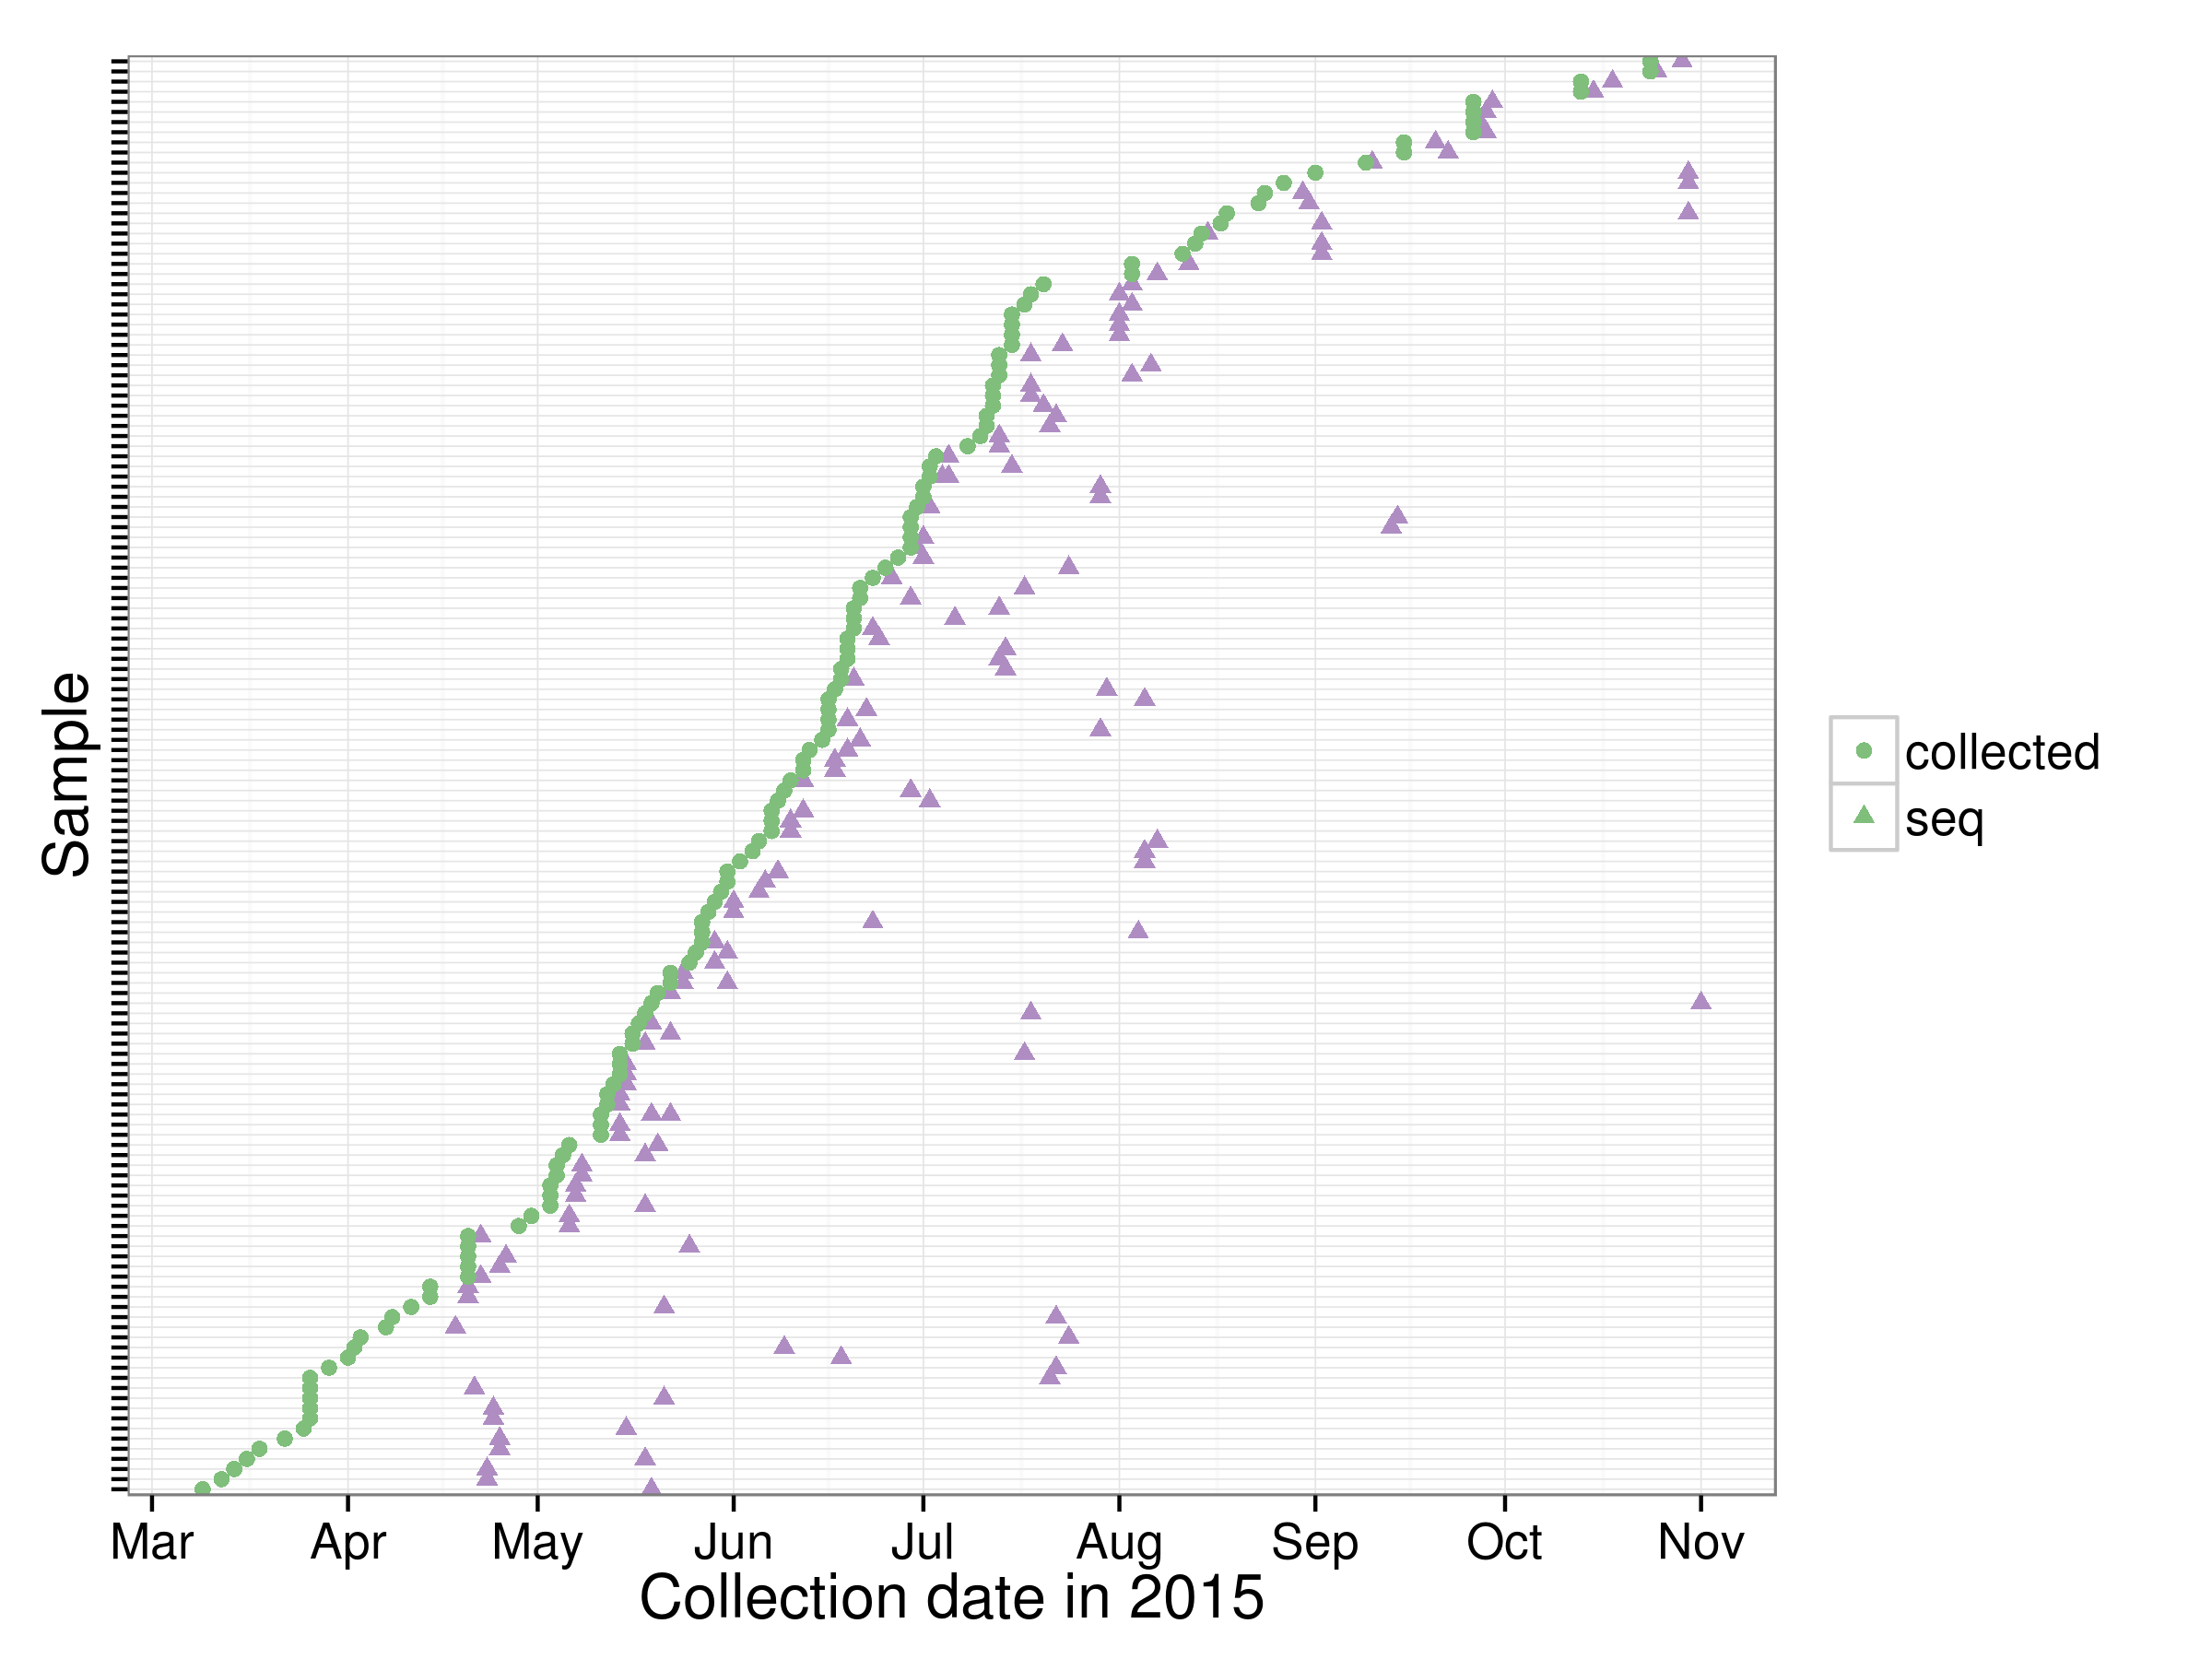

In [49]:
from IPython.display import Image
Image(filename='times.png') 